# Final Project

Fajri Sofianto

Data : Titanic https://www.kaggle.com/competitions/titanic/data

Membuat Machine Learning Classification untuk tugas akhir pelatihan Python for Data Science

Model yang digunakan adalah Naive Bayes dan 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [3]:
df_train = pd.read_csv('/Users/fajrisofianto/Downloads/titanic/train.csv') #import data training
df_test_fitur = pd.read_csv('/Users/fajrisofianto/Downloads/titanic/test.csv') #import data testing
df_test_target = pd.read_csv('/Users/fajrisofianto/Downloads/titanic/gender_submission.csv') #import data target

#df_train = pd.read_csv('D:/File_Analisa_Python/train.csv') #import data training
#df_test_fitur = pd.read_csv('D:/File_Analisa_Python/test.csv') #import data testing
#df_test_target = pd.read_csv('D:/File_Analisa_Python/gender_submission.csv') #import data target

display(df_train.head())
display(df_test_fitur.head())
display(df_test_target.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Data Preparation

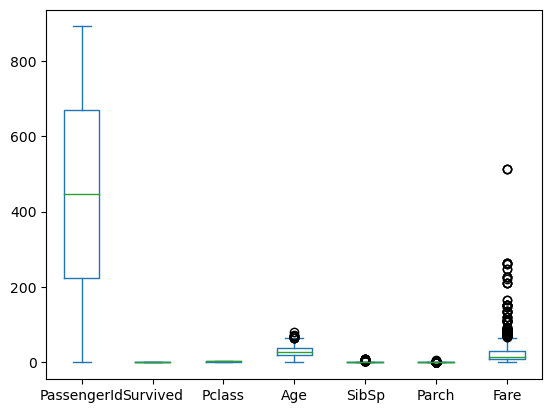

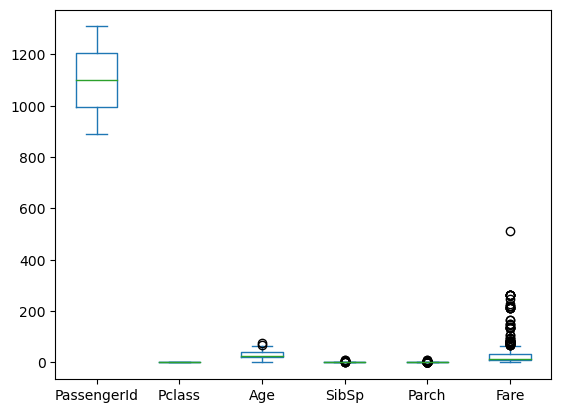

Disini PassengerId terlihat tidak berhubungan antara data training dan testing, sehingga tidak akan digunakan karena akan mempengaruhi tingkat akurasi


In [4]:
df_train.plot(kind='box')
df_test_fitur.plot(kind='box')
plt.show()
print('Disini PassengerId terlihat tidak berhubungan antara data training dan testing, sehingga tidak akan digunakan karena akan mempengaruhi tingkat akurasi')

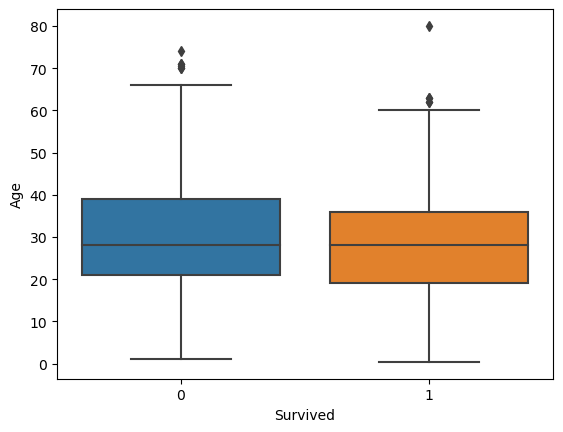

rata - rata umur yang selamat dan tidak hampir sama di sekitar umur 27 tahun


In [5]:
sns.boxplot(data=df_train, x='Survived', y='Age')
plt.show()

print('rata - rata umur yang selamat dan tidak hampir sama di sekitar umur 27 tahun')

jumlah pria yang tidak selamat jauh lebih banyak dibandingkan yang selamat, dan perempuan lebih banyak selamat dari peristiwa tenggelamnya kapal titanic ini


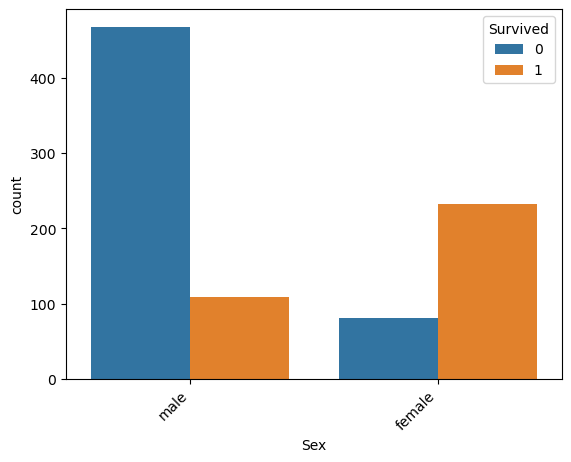

In [6]:
sns.countplot(data=df_train,x='Sex',hue='Survived')
plt.xticks(rotation=45, ha='right');

print('jumlah pria yang tidak selamat jauh lebih banyak dibandingkan yang selamat, dan perempuan lebih banyak selamat dari peristiwa tenggelamnya kapal titanic ini')

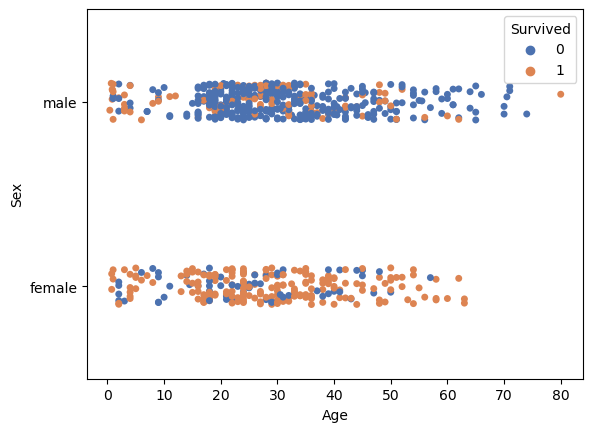

Perempuan lebih banyak yang selamat dibandingkan Laki - laki


In [7]:
sns.stripplot(x='Age', y='Sex', hue= 'Survived', data=df_train, palette='deep')
plt.show()
print('Perempuan lebih banyak yang selamat dibandingkan Laki - laki')

# Cleaning data testing Fitur

In [8]:
df_test_fitur.isnull().sum()
df_test_fitur['Age'] = df_test_fitur['Age'].fillna(0)
df_test_fitur['Fare'] = df_test_fitur['Fare'].fillna(0)
df_test_fitur = df_test_fitur[['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked']].fillna(0)

df_test_fitur.info()

df_test_target = df_test_target['Survived']
print('Data is Clean')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB
Data is Clean


# Cleaning data training

In [9]:
df_train = df_train[['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked', 'Survived']]

df_train.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

In [10]:
df_train['Age'] = df_train['Age'].fillna(0)
df_train = df_train.dropna()

/var/folders/gd/d1yw8nrs2lb3lk_h_0152xww0000gp/T/ipykernel_12242/2242659677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Age'] = df_train['Age'].fillna(0)


In [11]:
train_fitur = df_train[['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked']]
train_fitur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.6+ KB


In [12]:
train_target = df_train['Survived'] #define data training target survived or not
train_target.info()
train_target

<class 'pandas.core.series.Series'>
Int64Index: 889 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
889 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

# Encode data training

In [13]:
train_fitur = train_fitur.copy()

col_to_encode = ['Sex','Embarked']

for c in col_to_encode:
  le = LabelEncoder()
  train_fitur[c] = le.fit_transform(train_fitur[c])
  print(c, le.classes_)

train_fitur


Sex ['female' 'male']
Embarked ['C' 'Q' 'S']


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,0.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


# Encode data testing

In [14]:
df_test_fitur = df_test_fitur[['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked']]

test_fitur = df_test_fitur.copy()

col_to_encode = ['Sex','Embarked']

for c in col_to_encode:
  le = LabelEncoder()
  test_fitur[c] = le.fit_transform(test_fitur[c])
  print(c, le.classes_)

test_fitur

Sex ['female' 'male']
Embarked ['C' 'Q' 'S']


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,0.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,0.0,0,0,8.0500,2


# Modeling Naive Bayes

In [15]:
model_NB = GaussianNB()

model_NB.fit(train_fitur,train_target)

GaussianNB()

In [16]:
y_predNB = model_NB.predict(test_fitur)
print(classification_report(df_test_target, y_predNB))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       266
           1       0.81      0.95      0.87       152

    accuracy                           0.90       418
   macro avg       0.89      0.91      0.90       418
weighted avg       0.91      0.90      0.90       418



# Modeling Random Forrest

In [17]:
model_RF = RandomForestClassifier(n_estimators=6)
model_RF.fit(train_fitur, train_target)

RandomForestClassifier(n_estimators=6)

In [18]:
y_predRF = model_RF.predict(test_fitur)
print(classification_report(df_test_target, y_predRF))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       266
           1       0.80      0.79      0.79       152

    accuracy                           0.85       418
   macro avg       0.84      0.84      0.84       418
weighted avg       0.85      0.85      0.85       418



# Test Accuracy Score Naive Bayes

In [19]:
df_test_target.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [20]:
null_accuracy = (266/(266+152))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6364


nilai Null accuracy 0.63 berbanding dengan accuracy model Naive Bayes sebesar 0.90 sehingga dapat dikatakan model ini dapat memprediksi dengan baik

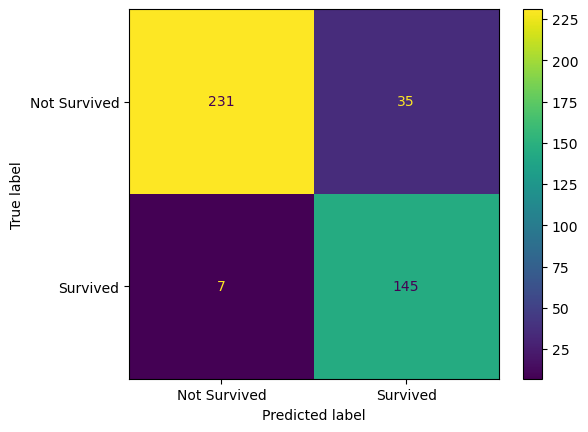

In [21]:
labels = ["Not Survived", "Survived"]
cm = confusion_matrix(df_test_target, y_predNB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [22]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[231  35]
 [  7 145]]

True Positives(TP) =  231

True Negatives(TN) =  145

False Positives(FP) =  35

False Negatives(FN) =  7


# Classification Accuracy

In [23]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [24]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8995


In [25]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1005


In [26]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8684


# Tuning Hasil Random Forrest

In [27]:
train_col = list(train_fitur.columns)
fitur_importance = pd.Series(model_RF.feature_importances_, index=train_col).sort_values(ascending=False)

fitur_importance

Sex         0.272806
Fare        0.266316
Age         0.245862
Pclass      0.081417
Parch       0.050746
SibSp       0.042709
Embarked    0.040144
dtype: float64

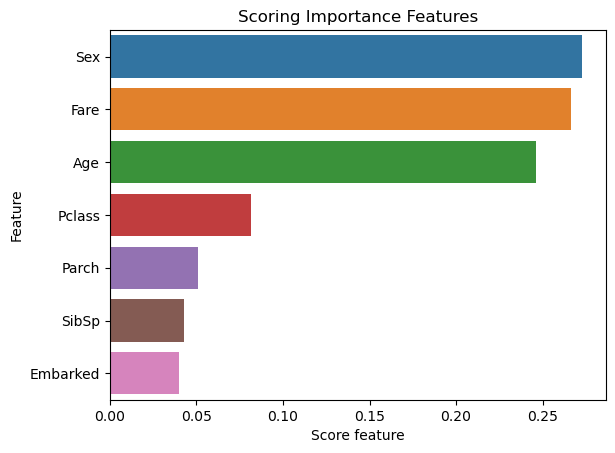

kita coba pakai 3 fitur paling tinggi scorenya


In [28]:
sns.barplot(x=fitur_importance, y=fitur_importance.index)
plt.xlabel('Score feature')
plt.ylabel('Feature')
plt.title('Scoring Importance Features')
plt.show()
print('''kita coba pakai 3 fitur paling tinggi scorenya''')

In [29]:
df_train_fiturRF = train_fitur[['Age','Fare','Sex']]
df_train_fiturRF

df_test_fiturRF = test_fitur[['Age','Fare','Sex']]

df_test_fiturRF

,Age,Fare,Sex
0,34.5,7.8292,1
1,47.0,7.0000,0
2,62.0,9.6875,1
3,27.0,8.6625,1
4,22.0,12.2875,0
...,...,...,...
413,0.0,8.0500,1
414,39.0,108.9000,0
415,38.5,7.2500,1
416,0.0,8.0500,1


In [34]:
model_RF = RandomForestClassifier(n_estimators=6)
model_RF.fit(df_train_fiturRF, train_target)

RandomForestClassifier(n_estimators=6)

In [33]:
y_predRF = model_RF.predict(df_test_fiturRF)
print(classification_report(df_test_target, y_predRF))

print('hasil malah menjadi turun, sehingga tuning gagal dan fitur yang lain ternyata tetap dibutuhkan')

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       266
           1       0.82      0.68      0.74       152

    accuracy                           0.83       418
   macro avg       0.82      0.80      0.81       418
weighted avg       0.83      0.83      0.82       418

hasil malah menjadi turun, sehingga tuning gagal dan fitur yang lain ternyata tetap dibutuhkan


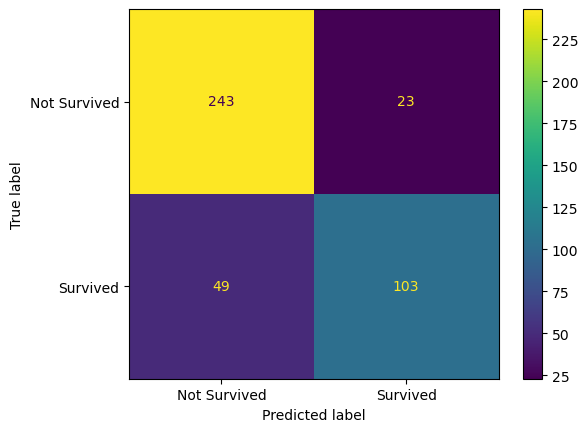

In [32]:
labels = ["Not Survived", "Survived"]
cm2 = confusion_matrix(df_test_target, y_predRF)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=labels)
disp.plot();

# Kesimpulan

- dari hasil penggunaan 2 model yaitu Naive Bayes dan Random Forrest, didapatkan bahwa tingkat akurasi model lebih tinggi Naive Bayes dibandingkan Random Forrest
- yaitu sebesar 90% akurasi berbanding dengan 85% akurasi

- akan tetapi nilai recall Random Forrest dalam menebak penumpang yang tidak selamat lebih tinggi dibandingkan dengan model Naive Bayes dengan nilai 91% berbanding 87%
- dan nilai recall Random Forrest dalam menebak penumpang yang selamat justru lebih kecil dibandingkan dengan model Naive Bayes yaitu sebesar 68% berbanding 95%

- saya akan lebih memilih model Naive Bayes dikarenakan tingkat akurasi Naive Bayes lebih baik dan kecepatan proses Naive Bayes lebih cepat tanpa harus tuning dibandingkan dengan model Random Forrest